In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import statsmodels.api as sm

In [2]:
df = pd.read_csv('./Data/bmi_500.csv')

In [3]:
#One=Hot 인코딩
one_hot = pd.get_dummies(df['Label']).astype(int)
df = pd.concat([df,one_hot], axis = 1)

In [4]:
for i in one_hot.columns:
    df['interaction_{}'.format(i)] = df['Height'] * df[i]

In [5]:
clm = ['Height'] + list(df.columns[-12:])

In [6]:
#상관관계 표시

mat= pd.DataFrame(columns = clm, index = clm)

for i in clm: #df[clm].corr()
    for w in clm:
        mat[i].loc[w] = df[i].corr(df[w])

C:\Users\125\AppData\Local\Temp\ipykernel_9948\913594950.py:7: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  mat[i].loc[w] = df[i].corr(df[w])


In [7]:
mat

,Height,Extreme Obesity,Extremely Weak,Normal,Obesity,Overweight,Weak,interaction_Extreme Obesity,interaction_Extremely Weak,interaction_Normal,interaction_Obesity,interaction_Overweight,interaction_Weak
Height,1.0,-0.443698,0.175723,0.105585,0.142506,0.146517,0.194468,-0.378785,0.179802,0.131407,0.191857,0.178353,0.199191
Extreme Obesity,-0.443698,1.0,-0.132293,-0.323978,-0.479954,-0.321249,-0.173711,0.993573,-0.132138,-0.322825,-0.477382,-0.319837,-0.173526
Extremely Weak,0.175723,-0.132293,1.0,-0.065372,-0.096845,-0.064822,-0.035051,-0.131443,0.998826,-0.06514,-0.096326,-0.064537,-0.035014
Normal,0.105585,-0.323978,-0.065372,1.0,-0.237168,-0.158744,-0.085839,-0.321895,-0.065295,0.996441,-0.235897,-0.158047,-0.085747
Obesity,0.142506,-0.479954,-0.096845,-0.237168,1.0,-0.235171,-0.127165,-0.47687,-0.096732,-0.236324,0.99464,-0.234137,-0.12703
Overweight,0.146517,-0.321249,-0.064822,-0.158744,-0.235171,1.0,-0.085116,-0.319184,-0.064746,-0.158179,-0.23391,0.995606,-0.085025
Weak,0.194468,-0.173711,-0.035051,-0.085839,-0.127165,-0.085116,1.0,-0.172594,-0.03501,-0.085533,-0.126484,-0.084742,0.998936
interaction_Extreme Obesity,-0.378785,0.993573,-0.131443,-0.321895,-0.47687,-0.319184,-0.172594,1.0,-0.131288,-0.32075,-0.474314,-0.317782,-0.172411
interaction_Extremely Weak,0.179802,-0.132138,0.998826,-0.065295,-0.096732,-0.064746,-0.03501,-0.131288,1.0,-0.065063,-0.096213,-0.064461,-0.034973
interaction_Normal,0.131407,-0.322825,-0.06514,0.996441,-0.236324,-0.158179,-0.085533,-0.32075,-0.065063,1.0,-0.235058,-0.157484,-0.085442


In [8]:
mat = mat.astype(float)

<Axes: xlabel='Label', ylabel='Weight'>

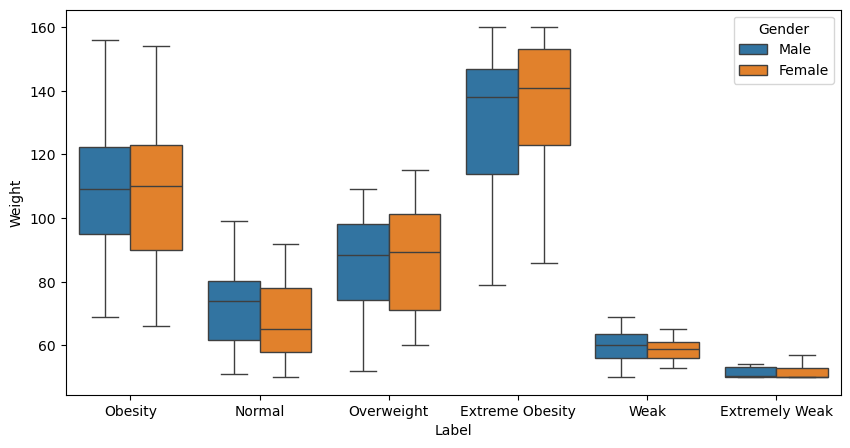

In [10]:
import seaborn as sns

plt.figure(figsize = (10,5))
sns.boxplot(df, x = 'Label', y = 'Weight' , hue = 'Gender' ) 

In [12]:
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

model = 'Weight ~ Gender * Label'
two_way_anova = ols(model, data= df).fit()
anova_lm(two_way_anova)

,df,sum_sq,mean_sq,F,PR(>F)
Gender,1.0,47.450980,47.450980,0.133932,7.145484e-01
Label,5.0,348870.714409,69774.142882,196.939546,1.427552e-114
Gender:Label,5.0,1455.246113,291.049223,0.821495,5.347076e-01
Residual,488.0,172894.588498,354.292190,NaN,NaN


In [14]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

print(pairwise_tukeyhsd(endog = df['Weight'] , groups = df['Gender'] + df['Label'], alpha = 0.05))

                Multiple Comparison of Means - Tukey HSD, FWER=0.05                 
        group1               group2        meandiff p-adj    lower    upper   reject
------------------------------------------------------------------------------------
FemaleExtreme Obesity FemaleExtremely Weak -83.6697    0.0 -107.8967 -59.4428   True
FemaleExtreme Obesity         FemaleNormal -68.6001    0.0  -80.1881 -57.0121   True
FemaleExtreme Obesity        FemaleObesity -27.4565    0.0  -37.1983 -17.7146   True
FemaleExtreme Obesity     FemaleOverweight -47.8047    0.0  -59.9383  -35.671   True
FemaleExtreme Obesity           FemaleWeak -76.8126    0.0 -101.0396 -52.5856   True
FemaleExtreme Obesity  MaleExtreme Obesity  -4.9745 0.7857  -13.7766   3.8276  False
FemaleExtreme Obesity   MaleExtremely Weak -84.0269    0.0 -110.0638 -57.9899   True
FemaleExtreme Obesity           MaleNormal -63.2769    0.0  -76.6017  -49.952   True
FemaleExtreme Obesity          MaleObesity -27.7133    0.0  -38.0

meandiff : 평균차이     p-adj : p값    lower, upper : 신뢰구간   reject : 귀무가설 기각여부 (True : 기각 )    
분석결과 : 귀무가설을 기각 -> 그룹간 평균이 통계적으로 차이가 있음

표본이 작아지면 1종 오류가 발생하기 쉬워진다. (통계량 왜곡)

In [17]:
from scipy.stats import chi2_contingency

data = [[5,47], [45, 3]]

chi2, p , dof, expected = chi2_contingency(data)

In [19]:
chi2 #카이제곱 통계량

np.float64(67.34775641025642)

In [20]:
p

np.float64(2.2760088834871043e-16)